In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [27]:
df = pd.read_csv('event_log.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [29]:
len(df)

885129

In [30]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [31]:
df['event_date'] = df['event_time'].str.slice(start=0,stop=10)

In [32]:
df['event_date_dtm'] = pd.to_datetime(df['event_date'],format='%Y-%m-%d')

In [33]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,2020-09-24


In [34]:
df1 = df.loc[(df['event_date_dtm']>'2020-09-30')]

In [35]:
dau_data = df1.groupby('event_date_dtm')['user_id'].nunique()

In [36]:
dau = pd.DataFrame({'event_date':dau_data.index, 'user_count':dau_data.values})

In [37]:
dau

,event_date,user_count
0,2020-10-01,2699
1,2020-10-02,2559
2,2020-10-03,2162
3,2020-10-04,2398
4,2020-10-05,2832
...,...,...
146,2021-02-24,2904
147,2021-02-25,2784
148,2021-02-26,2960
149,2021-02-27,2578


Text(0, 0.5, 'user_count')

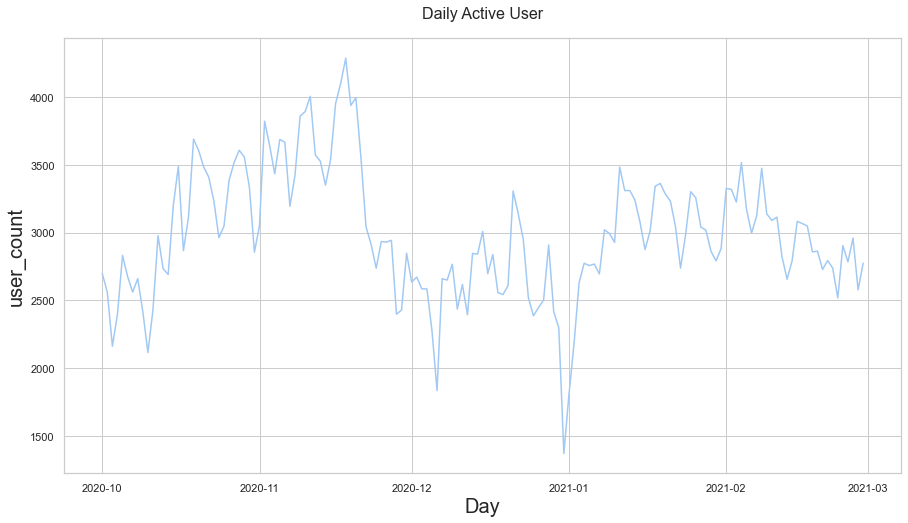

In [41]:
sns.set_theme(style = 'whitegrid', palette='pastel')
g = sns.lineplot(x='event_date',y='user_count', data= dau)
g.figure.set_size_inches(15,8)
g.set_title('Daily Active User',pad=20,size=16)
g.set_xlabel('Day', size=20)
g.set_ylabel('user_count', size=20)

In [44]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,2020-09-24


In [50]:
df['week_number'] = df.event_date_dtm.dt.strftime('%Y-w%U')

In [53]:
df1 = df.groupby('week_number')['user_id'].nunique()

In [54]:
df1.head()

week_number
2020-w38     5648
2020-w39    16754
2020-w40    16633
2020-w41    19305
2020-w42    22179
Name: user_id, dtype: int64

In [56]:
df1 = pd.DataFrame({'year_week_number':df1.index, 'user_count':df1.values})

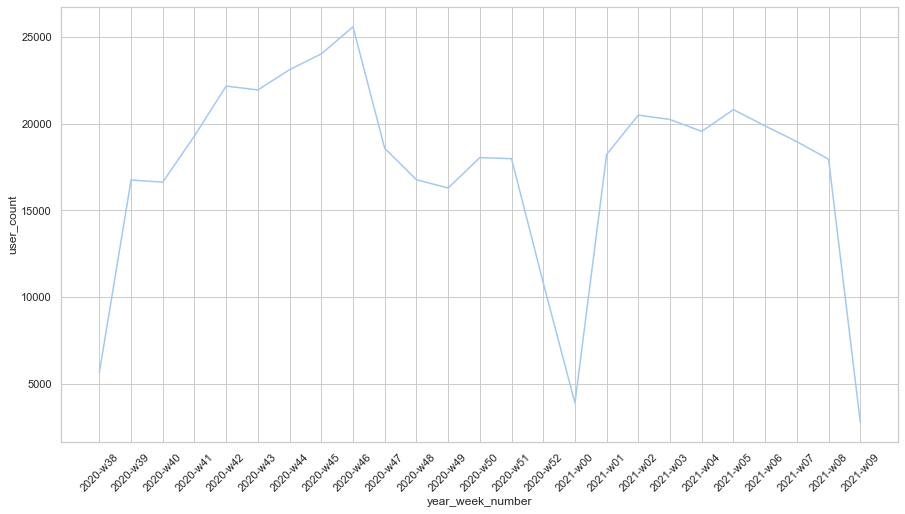

In [66]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.xticks(rotation=45)
g = sns.lineplot(x='year_week_number',y='user_count', data=df1)
g.figure.set_size_inches(15,8)

In [68]:
df.groupby('week_number')['event_date'].nunique()

week_number
2020-w38    3
2020-w39    7
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [71]:
w52 = '2020-w52'
w00 = '2021-w00'
df.loc[df.week_number == w52,['week_number']] = w00

In [73]:
wau = df.loc[df.week_number != '2020-w38']

In [76]:
wau_data = wau.loc[wau.week_number != '2021-w09']

In [79]:
wau_data.groupby('week_number')['event_date'].nunique()

week_number
2020-w39    7
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2021-w00    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
Name: event_date, dtype: int64

In [84]:
df1 = wau_data.groupby('week_number')['user_id'].nunique()

In [86]:
wau_df = pd.DataFrame({'year_week_number':df1.index, 'user_count':df1.values})

(0.0, 28000.0)

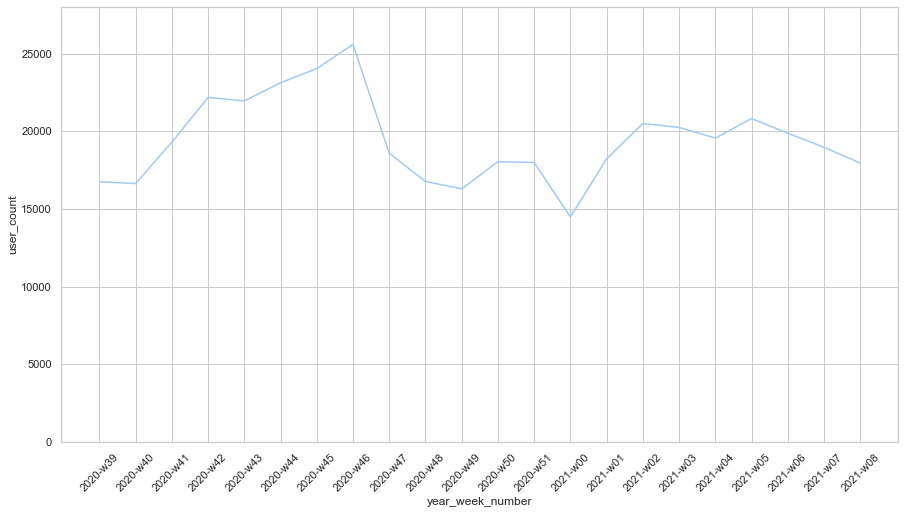

In [96]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.xticks(rotation=45)
g = sns.lineplot(x = 'year_week_number', y = 'user_count', data=wau_df)
g.figure.set_size_inches(15,8)
g.set_ylim(0,28000)

In [100]:
df = df.loc[df['event_date'] > '2020-09-30']

In [106]:
df['event_month'] = df['event_date'].str.slice(start=0, stop=7)

C:\Users\y2657\AppData\Local\Temp/ipykernel_4448/4179727160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_month'] = df['event_date'].str.slice(start=0, stop=7)


In [109]:
mau = df.groupby('event_month')['user_id'].nunique()

In [111]:
mau_df = pd.DataFrame({'month':mau.index, 'user_count':mau.values})

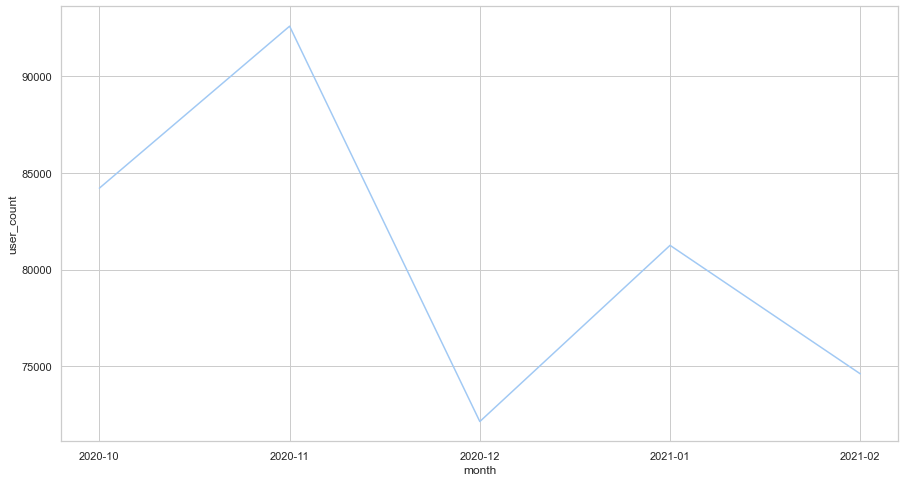

In [115]:
sns.set_theme(style='whitegrid', palette='pastel')
g = sns.lineplot(x = 'month', y = 'user_count', data=mau_df)
g.figure.set_size_inches(15,8)

In [120]:
avg_dau = dau.user_count.mean()

In [122]:
avg_mau = mau_df.user_count.mean()

In [123]:
dau_mau_ratio = avg_dau / avg_mau
print(dau_mau_ratio)

0.03686689357651966
